In [5]:

import os
import sys
import importlib
import seaborn as sns
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )


import compress_pickle
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_restricted_z.gz')
input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz')
grcs = [k for k in input_graph.grcs.keys()]



rosette_loc_size = {}
for mf_id, mf in input_graph.mfs.items():
    mf.get_all_mf_locs_size(rosette_loc_size)

# z_min = 15
# z_max = 35
z_min = 20
z_max = 30
mpd = MyPlotData()

averages = []
for rosette_loc, size in rosette_loc_size.items():
    x, y, z = rosette_loc
    if x < 360000 or x > 520000:
        continue
    if z < z_min*1000 or z > z_max*1000:
        continue
    averages.append(size)
    mpd.add_data_point(
        rosette_loc=rosette_loc,
        size=size,
        type='Rosette'
        )

import statistics
mean = statistics.mean(averages)
stdev = statistics.stdev(averages, mean)
print(f'Mean: {mean}, std: {stdev}')
print(f'Average: {sum(averages)/len(averages)}')
# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'rosette_size_figure_210116'

compress_pickle.dump(
    averages,
    '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'
    'rosette_size_db_210116.gz')



Mean: 14.820512820512821, std: 8.367754419156553
Average: 14.820512820512821


Height: 4, Aspect: 2


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


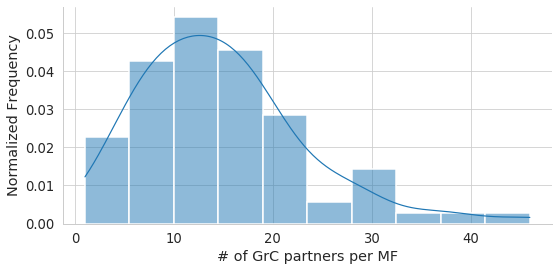

Height: 4, Aspect: 2


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


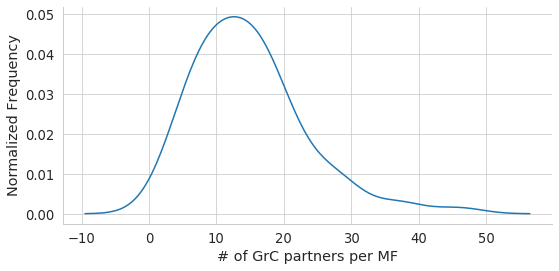

Height: 4, Aspect: 2


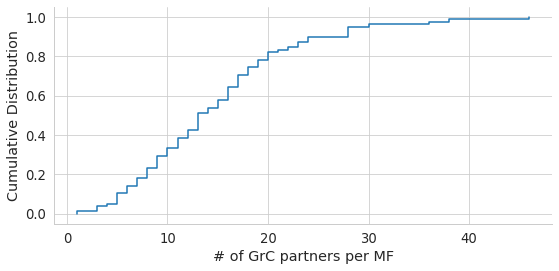

In [6]:

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='size',
    kind='hist',
    context='paper',
    kde=True,
    stat='density',
    height=4,
    aspect=2,
    x_axis_label='# of GrC partners per MF',
    y_axis_label='Normalized Frequency',
    save_filename=f'{script_n}_{z_min}_{z_max}_hist.svg',
    show=True,
    )

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='size',
    kind='kde',
    context='paper',
    # kde=True,
    height=4,
    aspect=2,
    x_axis_label='# of GrC partners per MF',
    y_axis_label='Normalized Frequency',
    save_filename=f'{script_n}_{z_min}_{z_max}_kde.svg',
    show=True,
    )

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='size',
    kind='ecdf',
    context='paper',
    # ecdf=True,
    height=4,
    aspect=2,
    y_axis_label='Cumulative Distribution',
    x_axis_label='# of GrC partners per MF',
    save_filename=f'{script_n}_{z_min}_{z_max}_ecdf.svg',
    show=True,
    )



Height: 4, Aspect: 0.75


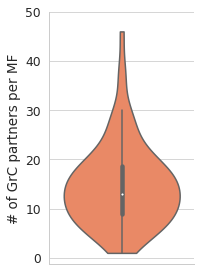

In [8]:

importlib.reload(my_plot); my_plot.my_catplot(
    mpd,
    # x="size",
    y="size",
    # hue="type",
    # hue_order=['All', 'Per PC', 'Per pf'],
    # hue_order=['All', 'Per PC'],
    ylim=[None, 50],
    context='paper',
    kind='violin',
    cut=0,
    # palette=sns.color_palette("mako_r", as_cmap=True),
    # palette=sns.color_palette("rocket"),
    color='coral',
    # font_scale=1.5,
    height=4,
    # width=2,
    aspect=.75,
    y_axis_label='# of GrC partners per MF',
    # x_axis_label='# of GrCs per MF',
    save_filename=f'{script_n}_{z_min}_{z_max}_violin.svg',
    show=True,
    )



In [ ]:

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='size',
    kind='hist',
    context='paper',
    kde=True,
    stat='density',
    height=4,
    aspect=2,
    x_axis_label='# of GrC partners per MF',
    y_axis_label='Normalized Frequency',
    save_filename=f'{script_n}_{z_min}_{z_max}_hist.svg',
    show=True,
    )


In [4]:
import compress_pickle
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_restricted_z.gz')
input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz')
grcs = [k for k in input_graph.grcs.keys()]

rosette_loc_size = {}
for mf_id, mf in input_graph.mfs.items():
    mf.get_all_mf_locs_size(rosette_loc_size)

rosette_loc_size

# # z_min = 15
# # z_max = 35
# z_min = 20
# z_max = 30
# mpd = MyPlotData()

# averages = []
# for rosette_loc, size in rosette_loc_size.items():
#     x, y, z = rosette_loc
#     if x < 360000 or x > 520000:
#         continue
#     if z < z_min*1000 or z > z_max*1000:
#         continue
#     averages.append(size)
#     mpd.add_data_point(
#         rosette_loc=rosette_loc,
#         size=size,
#         type='Rosette'
#         )


{(424939, 427621, 18446): 18,
 (431555, 431371, 15493): 9,
 (390442, 407269, 20429): 36,
 (405425, 418580, 19666): 16,
 (493273, 418368, 19672): 9,
 (491163, 391393, 20654): 8,
 (365954, 409152, 26348): 10,
 (570235, 407538, 12408): 3,
 (515478, 409765, 26997): 20,
 (497259, 415850, 32598): 10,
 (483533, 443944, 5331): 21,
 (486859, 426230, 10809): 23,
 (424513, 425414, 11838): 22,
 (593421, 440168, 10894): 12,
 (459740, 426274, 11558): 20,
 (485969, 441748, 17231): 17,
 (393644, 465148, 42666): 11,
 (287000, 419165, 6772): 9,
 (312114, 404814, 32473): 13,
 (479233, 426452, 21691): 17,
 (497580, 446516, 24130): 22,
 (477579, 418414, 28917): 28,
 (609615, 456141, 39491): 4,
 (561559, 464210, 23546): 13,
 (539170, 449342, 35732): 16,
 (600155, 419983, 40441): 13,
 (656492, 435240, 30990): 1,
 (640254, 420622, 27232): 3,
 (583160, 423206, 41861): 4,
 (452657, 422475, 19124): 19,
 (516986, 451806, 43099): 12,
 (449612, 467708, 15832): 7,
 (455594, 444902, 30865): 12,
 (453472, 452398, 1455